# Simple Build FX Volatility Surface to ATM and 25D

Construct an FX volatility surface to different terms using ATM volatility, risk reversals and strangles. The example is taken from the book by Iain Clarke (see Tables 3.3 and 3.4 of the book)

In [1]:
from financepy.utils.date import Date
from financepy.market.curves.discount_curve_flat import *
from financepy.market.volatility.fx_vol_surface import *

In [2]:
value_dt = Date(10, 4, 2020)

In [3]:
for_name = "EUR"
dom_name = "USD"
currency_pair = for_name + dom_name
spot_fx_rate = 1.3465

In [4]:
for_cc_rate = 0.03460  # EUR
dom_cc_rate = 0.02940  # USD

In [5]:
domestic_curve = DiscountCurveFlat(value_dt, dom_cc_rate)
foreign_curve = DiscountCurveFlat(value_dt, for_cc_rate)

In [6]:
tenors = ['1M', '2M', '3M', '6M', '1Y', '2Y']
atm_vols = [21.00, 21.00, 20.750, 19.400, 18.250, 17.677]
mkt_strangle_25d_vols = [0.65, 0.75, 0.85, 0.90, 0.95, 0.85]
rsk_reversal_25d_vols = [-0.20, -0.25, -0.30, -0.50, -0.60, -0.562]

In [7]:
notional_currency = for_name

In [8]:
atm_method = FinFXATMMethod.FWD_DELTA_NEUTRAL
delta_method = FinFXDeltaMethod.SPOT_DELTA

In [9]:
fx_market = FXVolSurface(value_dt,
                              spot_fx_rate,
                              currency_pair,
                              notional_currency,
                              domestic_curve,
                              foreign_curve,
                              tenors,
                              atm_vols,
                              mkt_strangle_25d_vols,
                              rsk_reversal_25d_vols,
                              atm_method,
                              delta_method)

In [10]:
fx_market.check_calibration(True)

VALUE DATE: 10-APR-2020
SPOT FX RATE: 1.3465
ATM METHOD: FinFXATMMethod.FWD_DELTA_NEUTRAL
DELTA METHOD: FinFXDeltaMethod.SPOT_DELTA
TENOR: 1M
EXPIRY DATE: 10-MAY-2020
IN ATM VOL: 21.000000 %
IN MKT STRANGLE 25d VOL:  0.650000 %
IN RSK REVERSAL 25d VOL: -0.200000 %
T_(YEARS):  0.0821917808219178
CNT_CPD_RD: 2.940000 %
CNT_CPD_RF: 3.460000 %
FWD_RATE:   1.345925
VOL FUNCTION VolFuncTypes.CLARK
VOL_PARAMETERS: [-1.56039686  0.02648135  0.46552413]
OUT_K_ATM:   1.348366
OUT_ATM_VOL: 21.000002 %
CALL_DELTA:  0.498580  PUT_DELTA: -0.498580  NET_DELTA:  0.000000
MKT STRANGLE VOL IN:  0.650000 %
k_25d_c_ms:  1.405978  ATM + ms_vol: 21.650000 %   DELTA:  0.250000
k_25d_p_ms:  1.293410  ATM + ms_vol: 21.650000 %   DELTA: -0.250000
CALL_VALUE:  0.012099  PUT_VALUE:  0.012876  MS_VALUE:  0.024975
k_25d_c_ms:  1.405978  SURFACE_VOL: 21.555032 %   DELTA:  0.248975
k_25d_p_ms:  1.293410  SURFACE_VOL: 21.744762 %   DELTA: -0.250844
CALL_VALUE:  0.011983 PUT_VALUE:  0.012992  MS_SKEW_VALUE:  0.024975
K

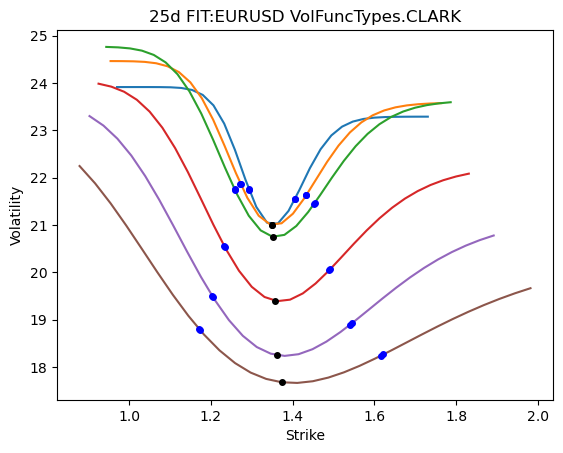

In [11]:
fx_market.plot_vol_curves()

## Extracting Information from Volatility Surface

In [14]:
fx_market.parameters

array([[-1.56039686,  0.02648135,  0.46552413],
       [-1.56017826,  0.03659903,  0.53523191],
       [-1.57191863,  0.04679818,  0.61112213],
       [-1.63829454,  0.07770234,  0.69685705],
       [-1.69812393,  0.10862678,  0.80408117],
       [-1.72842437,  0.13086015,  0.81526465]])

We can extract information from the volatility surface

In [15]:
expiry_dts = value_dt.add_tenor(tenors)

In [17]:
K = fx_market.k_atm[0]

The zeroth curve is the 1M volatility smile

In [18]:
K, fx_market.volatility(K, expiry_dts[0])

(np.float64(1.3483661021875544), 0.21000001761081796)

The fifth curve is the 2Y volatility smile

In [20]:
K = fx_market.k_atm[-1]

In [21]:
K, fx_market.volatility(K,expiry_dts[-1])

(np.float64(1.3748659922257365), np.float64(0.1767701277360272))

Copyright (c) 2020 Dominic O'Kane